In [36]:
!pip install fake-useragent
import bs4
import requests
from fake_useragent import UserAgent
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [37]:
prod_name = []
prod_rating = []
prod_price = []
final_array = []

df = pd.DataFrame()

In [38]:
user_agent = UserAgent() # store collected data at your os temp dir.

In [39]:
product_name = input("Product Name: ")# we extract the product data as input 

Product Name: laptop


In [40]:
for i in range(1,5):
    url = "https://www.flipkart.com/search?q={0}&page={1}"
    #url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=37619f53-b5c8-4354-b4f7-93c0519e9570&as-searchtext=lap"
    url = url.format(product_name,i)
    
    page = requests.get(url, headers={"user-agent":user_agent.chrome}) #getting response from page
    html = page.content                                                #storing content in variables
    
    page_soup = bs4.BeautifulSoup(html,"html.parser")                  #create BeautifulSoup object
    
    products = page_soup.find_all("div",{"class":"_3wU53n"})           #finding all required product
    for item in products:
        prod_name.append(item.text)
        
    rating =  page_soup.find_all("div",{"class":"hGSR34"})            #rating data extracting using for loop
    for item in rating:
        prod_rating.append(item.text)
        
    price =  page_soup.find_all("div",{"class":"_1vC4OE _2rQ-NK"})  # price of all product fetched by using for loop
    for item in price:
        prod_price.append(item.text)
        
    
    

### Will use Zip function to get the combined result in Single DataFrame based on the product,ratings and price.

In [41]:
for product,rating,price in zip(prod_name,prod_rating,prod_price):
    final_array.append({'Products':product,'Rating':rating,'Price':price})
    
df=pd.DataFrame(final_array)    

In [42]:
df.head()

,Products,Rating,Price
0,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.6,"₹52,990"
1,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,"₹56,990"
2,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.6,"₹60,990"
3,Asus VivoBook 14 Core i3 10th Gen - (4 GB/256 ...,4.4,"₹37,990"
4,HP 15s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.4,"₹52,990"


### Here we are Removing "₹" and "," from Price column from string data type to Numeric data type:
In this below code we are using "regex"(Regular Expression)for replacing the notation.

In [43]:
df['Price'] = df['Price'].str.lstrip("₹")
df['Price'] = df['Price'].replace({",":""},regex=True)
df.head()

,Products,Rating,Price
0,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.6,52990
1,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,56990
2,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.6,60990
3,Asus VivoBook 14 Core i3 10th Gen - (4 GB/256 ...,4.4,37990
4,HP 15s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.4,52990


### We are converting "Ratings" and "Price" into float datatype to perform any mathematical operations.

In [44]:
df['Rating'] = df['Rating'].astype(np.float)
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Products  96 non-null     object 
 1   Rating    96 non-null     float64
 2   Price     96 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


### For future reference,need to save the DataFrame into csv file

In [45]:
df.to_csv("laptop.csv")
df

,Products,Rating,Price
0,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.6,52990
1,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,56990
2,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.6,60990
3,Asus VivoBook 14 Core i3 10th Gen - (4 GB/256 ...,4.4,37990
4,HP 15s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.4,52990
...,...,...,...
91,HP Omen Ryzen 7 Octa Core - (8 GB/512 GB SSD/W...,4.1,85990
92,Apple MacBook Core m3 7th Gen - (8 GB/256 GB S...,4.8,112990
93,Acer Swift 3 Core i5 10th Gen - (8 GB/512 GB S...,4.2,65490
94,Lenovo IdeaPad Gaming 3i Core i7 10th Gen - (8...,5.0,82990


### Subset the Dataset with Ratings greater than or equal to 4

In [46]:
df1=df[(df['Rating']>=4)]
df1

,Products,Rating,Price
0,HP 14s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.6,52990
1,Acer Aspire 7 Core i5 9th Gen - (8 GB/512 GB S...,4.5,56990
2,MSI GF63 Thin Core i5 9th Gen - (8 GB/512 GB S...,4.6,60990
3,Asus VivoBook 14 Core i3 10th Gen - (4 GB/256 ...,4.4,37990
4,HP 15s Core i5 10th Gen - (8 GB/512 GB SSD/Win...,4.4,52990
...,...,...,...
90,Asus Core i5 10th Gen - (8 GB/1 TB HDD/Windows...,4.7,49990
91,HP Omen Ryzen 7 Octa Core - (8 GB/512 GB SSD/W...,4.1,85990
92,Apple MacBook Core m3 7th Gen - (8 GB/256 GB S...,4.8,112990
93,Acer Swift 3 Core i5 10th Gen - (8 GB/512 GB S...,4.2,65490


### We can sort the Rating and Price of the Product and select top 10 product and store in another variable.

In [47]:
df1 = df1.sort_values(["Price","Rating"],ascending = (False, False))
top_product = df1.head(10)

In [48]:
top_product

,Products,Rating,Price
54,Alienware Core i9 10th Gen - (32 GB/1 TB SSD/W...,4.4,339990
65,MSI GS66 Stealth Core i7 10th Gen - (32 GB/1 T...,4.0,254990
70,Asus ZenBook Pro Duo Core i9 9th Gen - (32 GB/...,4.5,244191
86,Apple MacBook Pro Core i9 9th Gen - (16 GB/1 T...,4.8,239900
72,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,5.0,199900
64,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,4.5,199900
60,Apple MacBook Pro with Touch Bar Core i5 10th ...,5.0,194900
58,Apple MacBook Pro with Touch Bar Core i5 10th ...,4.7,174900
16,Apple MacBook Pro with Touch Bar Core i5 8th G...,4.8,142990
50,Apple MacBook Air Core i5 10th Gen - (8 GB/512...,4.6,122990


### Now visualize our scrapped data in graph. here we can use Matplotlib package to show the dedicated graph based on the "Product" and "Price".

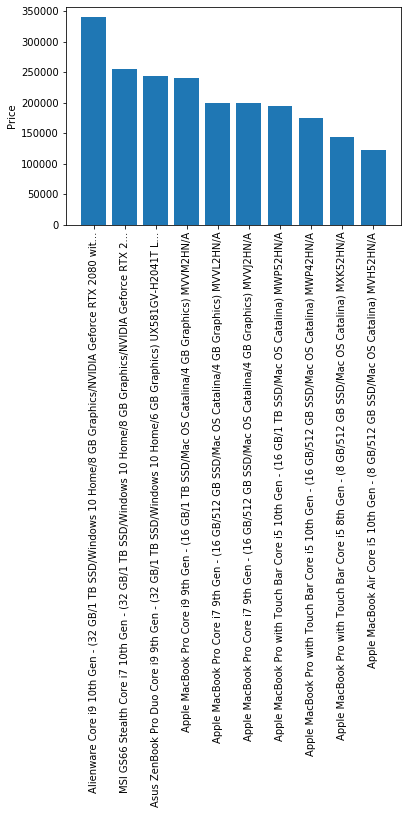

In [50]:
fig,ax=plt.subplots()
ax.bar(top_product['Products'],top_product['Price'])
ax.set_xticklabels(top_product['Products'],rotation=90)
ax.set_ylabel('Price')
plt.show()

### Now our Visualization based on the "Product" and "Ratings".

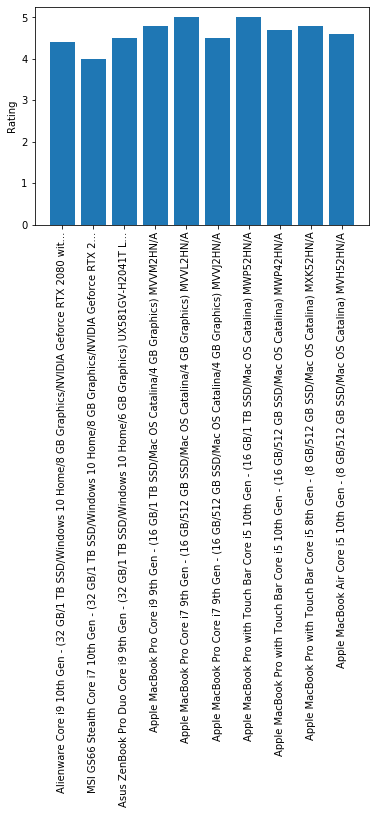

In [51]:
fig,ax=plt.subplots()
ax.bar(top_product['Products'],top_product['Rating'])
ax.set_xticklabels(top_product['Products'],rotation=90)
ax.set_ylabel('Rating')
plt.show()

### Now,we can visualize our data based on "Rating" and "Price".Here We can use "Seaborn"python package.

### The below output will show the "Rating" and "Price" as per our budget.

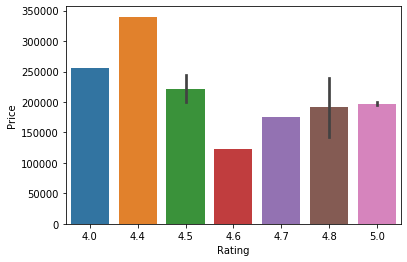

In [52]:
g= sns.barplot(x=top_product['Rating'],y=top_product['Price'])

## Now our objective we have to find our product with best "Ratings" and "Price".

In [54]:
top_product [(top_product['Price'] >=150000) & (top_product['Price'] <=200000) & (top_product['Rating'] >= 4.5)]

,Products,Rating,Price
72,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,5.0,199900
64,Apple MacBook Pro Core i7 9th Gen - (16 GB/512...,4.5,199900
60,Apple MacBook Pro with Touch Bar Core i5 10th ...,5.0,194900
58,Apple MacBook Pro with Touch Bar Core i5 10th ...,4.7,174900


# We concluded these below points,

##.From above visualization my analysis is that product available with in 4.5,4.7,4.8 and 5 ratings with price range from 150000 to 200000

##.Our selected product having high 'Ratings'with good 'Prices'as well.